In [1]:
#!pip install tensorflow sklearn pandas numpy

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# Loading and Visualizing the Dataset

In [3]:
df = pd.read_csv('Spam Collection Dataset/spam.csv',delimiter=',',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

Text(0.5, 1.0, 'Number of ham and spam messages')

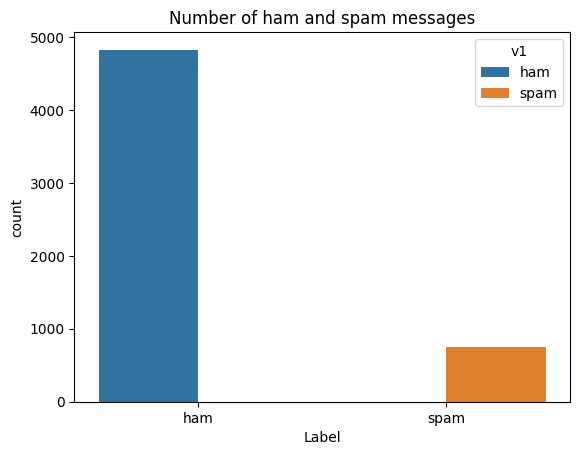

In [15]:
sns.countplot(data=df, x='v1', hue='v1')
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [18]:
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])

In [20]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates(keep = 'first')

In [23]:
df.duplicated().sum()

0

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\talha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
# df['words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
df.loc[:, 'words'] = df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()

,v1,v2,words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [34]:
df[df['v1']==0][['words']].describe()

,words
count,4516.000000
mean,17.123782
std,13.493970
min,1.000000
25%,8.000000
50%,13.000000
75%,22.000000
max,220.000000


In [35]:
df[df['v1']==1][['words']].describe()

,words
count,653.000000
mean,27.667688
std,7.008418
min,2.000000
25%,25.000000
50%,29.000000
75%,32.000000
max,46.000000


C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Dev\Spam SMS Detection\spamsmsdetection\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<Axes: xlabel='words', ylabel='Count'>

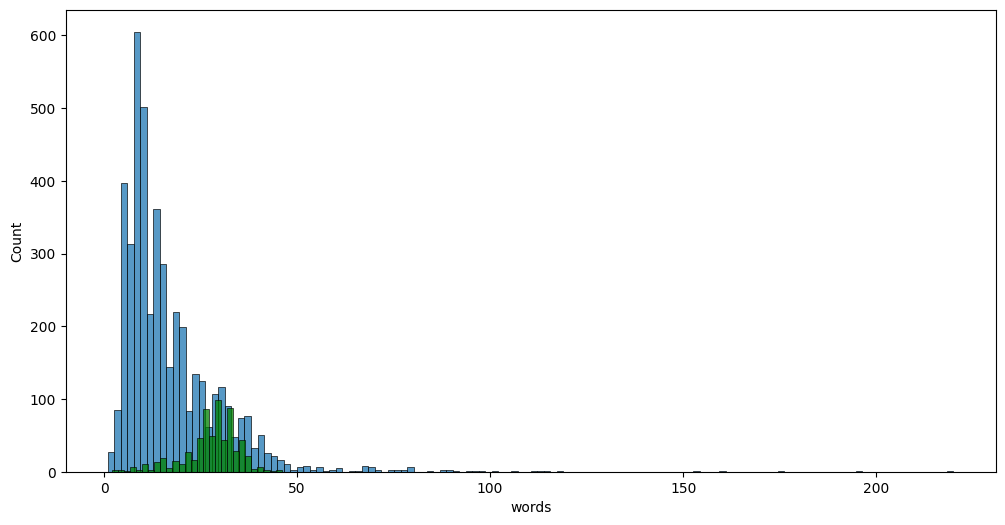

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1'] == 0]['words'])
sns.histplot(df[df['v1'] == 1]['words'],color='green')

# Data Preperation

In [38]:
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [40]:
#df['after_transformation'] = df['v2'].apply(transform_text)
df.loc[:, 'after_transformation'] = df['v2'].apply(transform_text)

In [41]:
df.head()

,v1,v2,words,after_transformation
0,0,"Go until jurong point, crazy.. Available only ...",24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,nah think goe usf live around though


# Building the Model

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

## Splitting the Data

In [44]:
X = tfidf.fit_transform(df['after_transformation']).toarray()

In [45]:
y = df['v1'].values

### Splitting into Train and Test Data

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Accuracy Report

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('The Accuracy of the Model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

## Applying ML Classification Models

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

mnb = MultinomialNB()
dtree = DecisionTreeClassifier(max_depth=5)
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
rf = RandomForestClassifier(n_estimators=50, random_state=2)

In [50]:
mnb.fit(X_train, y_train)
dtree.fit(X_train, y_train)
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [51]:
mnbtrain = mnb.predict(X_train)
mnbtest = mnb.predict(X_test)

dtreetrain = dtree.predict(X_train)
dtreetest = dtree.predict(X_test)

adatrain = ada.predict(X_train)
adatest = ada.predict(X_test)

rftrain = rf.predict(X_train)
rftest = rf.predict(X_test)

## Comparison Of Accuracies

### For Multi-Nomial Naive Bayes Classifier

In [54]:
print(acc_report(y_train, mnbtrain))
print(acc_report(y_test, mnbtest))

The Accuracy of the Model is  0.9789600967351875
[[3618    2]
 [  85  430]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3620
           1       1.00      0.83      0.91       515

    accuracy                           0.98      4135
   macro avg       0.99      0.92      0.95      4135
weighted avg       0.98      0.98      0.98      4135

None
The Accuracy of the Model is  0.9709864603481625
[[896   0]
 [ 30 108]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

None


- The Train Accuracy is: 97.89
- The Test Accuracy is: 97.09

### For Decision Tree Classifier

In [55]:
print(acc_report(y_train, dtreetrain))
print(acc_report(y_test, dtreetest))

The Accuracy of the Model is  0.9492140266021766
[[3585   35]
 [ 175  340]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3620
           1       0.91      0.66      0.76       515

    accuracy                           0.95      4135
   macro avg       0.93      0.83      0.87      4135
weighted avg       0.95      0.95      0.95      4135

None
The Accuracy of the Model is  0.9323017408123792
[[879  17]
 [ 53  85]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       896
           1       0.83      0.62      0.71       138

    accuracy                           0.93      1034
   macro avg       0.89      0.80      0.84      1034
weighted avg       0.93      0.93      0.93      1034

None


- The Train Accuracy is: 94.29 
- The Test Accuracy is: 93.23

### For ADA Boost Classifier

In [56]:
print(acc_report(y_train, adatrain))
print(acc_report(y_test, adatest))

The Accuracy of the Model is  0.9717049576783555
[[3603   17]
 [ 100  415]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3620
           1       0.96      0.81      0.88       515

    accuracy                           0.97      4135
   macro avg       0.97      0.90      0.93      4135
weighted avg       0.97      0.97      0.97      4135

None
The Accuracy of the Model is  0.960348162475822
[[888   8]
 [ 33 105]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       896
           1       0.93      0.76      0.84       138

    accuracy                           0.96      1034
   macro avg       0.95      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034

None


- The Train Accuracy is: 97.17
- The Test Accuracy is: 96.03

### For Random Forest Classifier

In [57]:
print(acc_report(y_train, rftrain))
print(acc_report(y_test, rftest))

The Accuracy of the Model is  0.999758162031439
[[3620    0]
 [   1  514]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3620
           1       1.00      1.00      1.00       515

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135

None
The Accuracy of the Model is  0.9758220502901354
[[894   2]
 [ 23 115]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.97      1034

None


- The Train Accuracy is: 99.97
- The Test Accuracy is: 97.58

## Conclusion 

- Multi-Nomial Naive Bayes Will Be Chosen as it has Low Bias and Varience
- Low Bias:
    - Low bias indicates that the model's predictions are very close to the true values in the training data.
    - A model with low bias fits the training data well and captures the underlying patterns effectively.
    - It doesn't make strong assumptions about the data, allowing it to model complex relationships.
    - In terms of errors, low bias implies low training error.
- Low Varience
    - Low variance means that the model's predictions do not vary much when the model is trained on different subsets of the training data or with small perturbations in the data.
    - A model with low variance is stable and doesn't overfit the training data.
    - It generalizes well to unseen data because it doesn't learn noise or random fluctuations in the training data.
    - In terms of errors, low variance implies low testing error.

# Deployment

In [59]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('Spam-SMS-Detector.pkl','wb'))

In [64]:
!pip install gradio

                                              0.0/20.1 MB ? eta -:--:--
                                              0.0/20.1 MB 1.4 MB/s eta 0:00:15
                                              0.0/20.1 MB 1.4 MB/s eta 0:00:15
                                             0.1/20.1 MB 409.6 kB/s eta 0:00:49
                                             0.1/20.1 MB 656.4 kB/s eta 0:00:31
                                             0.1/20.1 MB 656.4 kB/s eta 0:00:31
                                             0.2/20.1 MB 737.3 kB/s eta 0:00:27
                                             0.2/20.1 MB 801.7 kB/s eta 0:00:25
                                             0.3/20.1 MB 912.8 kB/s eta 0:00:22
                                              0.4/20.1 MB 1.1 MB/s eta 0:00:19
                                              0.5/20.1 MB 1.0 MB/s eta 0:00:20
                                              0.5/20.1 MB 1.0 MB/s eta 0:00:19
                                              0.5/20.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
%%writefile app.py
import gradio as gr
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

def main():
    tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
    model = pickle.load(open('Spam-SMS-Detector.pkl', 'rb'))

    ps = PorterStemmer()

    def transform_text(text):
        text = text.lower()
        text = nltk.word_tokenize(text)
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)

        text = y[:]
        y.clear()

        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)

        text = y[:]
        y.clear()

        for i in text:
            y.append(ps.stem(i))


        return " ".join(y)

def predict_sms(input_text):
    transformed_input = transform_text(input_text)
    vectorizedd = tfidf.transform([transformed_input])
    result = model.predict(vectorizedd)[0]
    return "Spam" if result == 1 else "Genuine"

iface = gr.Interface(
    fn=predict_sms,
    inputs=gr.Textbox(label="Enter the SMS", placeholder="Type your SMS here..."),
    outputs=gr.Label(label="Result"),
    live=True
)

iface.launch()
    

#    if st.button('Detect'):
#        transformed_input = transform_text(input_text)
#        vectorizedd = tfidf.transform([transformed_input])
#        result = model.predict(vectorizedd)[0]

#        if result==1:
#            st.header("Spam")
#        else:
#            st.header("Genuine")
            
if __name__ == '__main__':
    main()

Overwriting app.py


In [1]:
import gradio as gr
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer


tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('Spam-SMS-Detector.pkl', 'rb'))

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

def predict_sms(input_text):
    transformed_input = transform_text(input_text)
    vectorizedd = tfidf.transform([transformed_input])
    result = model.predict(vectorizedd)[0]
    return "Spam" if result == 1 else "Genuine"

iface = gr.Interface(
    fn=predict_sms,
    inputs=gr.Textbox(label="Enter the SMS", placeholder="Type your SMS here..."),
    outputs=gr.Label(label="Result"),
    live=True
)


iface.launch(share=True)   


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://bfefee39da5ae4cf4d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
